In [1]:
from plotly.subplots import make_subplots
from matplotlib.lines import Line2D
from termcolor import colored
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
import numpy as np
import warnings 
import plotly.express as px
warnings.filterwarnings('ignore')
from plotly.offline import iplot, init_notebook_mode
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf
import random
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

In [2]:
#andom.seed(2021)

### libs 

In [3]:
from MLib import  get_col_names, MakePlots, plot_bar_polar, plot_dostributions
from MLib import  get_numerical_data, plot_heatmap
from MLib import fill_nan, check_null_dublicates, clean_data_column

In [4]:
international_students = pd.read_csv('210715Survey/results-survey128798.csv')

In [5]:
international_students.shape

(119, 125)

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#international_students.head()

In [7]:
#international_students = international_students.drop([0, 1])#.reset_index(drop=True)

In [8]:
international_students = international_students.dropna(axis=1, how='all')

In [9]:
international_students = international_students.drop(['Which student are you? [Other]',
'If you was enrolled at Unipd, where did you live before the Covid-19 outbreak (September 2019-January 2020)? [Other]',
    'Where did you live during the first lockdown: March-June 2020 (second semester, academic year 2019-2020) [Other]',
'From which country did you follow the majority of the online lessons? [Other]',
'Which network do you usually use to connect to online lessons? [Other]',
], 1)

In [10]:
def replace_missing_value(data, cols):
    
    for col in cols:
        
        
        if col == 'Gender':
            data[col] = data[col].fillna('I prefer not to say')
        
        elif col == 'TypeOfStudent':
            
            data[col] = data[col].fillna('Other')
            
        elif col == 'DoB':
            
            data[col] = data[col].fillna(2020)
        elif col == 'WhyRemainedPD':
            
            data[col] = data[col].fillna('Lockdown')
        
        elif col == 'AdviceOnlineLessons':

            data[col] = data[col].fillna('No advice')
        
        elif col == 'CountryB4Covid' or col == 'Nationality' or col == 'OnlineLessonsCountry' or col == 'BScDegreeCountry':
            data[col] = data[col].fillna('Unknown')
        
        else:
            data[col] = data[col].fillna('NotSpecified')
        
    return data

In [11]:
international_students_num = international_students.select_dtypes(include='number')
international_students_obj = international_students.select_dtypes(include='object')

In [12]:
international_students_num.columns = get_col_names()[1]

In [13]:
international_students_obj.columns = get_col_names()[0]

In [25]:
intstudents = pd.concat([international_students_obj, international_students_num], axis=1)

In [26]:
cols = ['HomeB4Covid','Nationality','Gender','BScDegreeCountry','EnrolmentDate@Unipd','CountryB4Covid',
        'FutureDecisions','TypeOfStudent','DoB','ActionFirstLockDown2020','Residency1stLockDown2020',
        'ResidencyFirstSemester20<>21','OtherResidencyFirstSemester20<>21','WhyRemainedPD','NumFlateOtherMates',
       'OtherFutureDecisions','HousingQuarantine','AdviceOnlineLessons','DegreeLevel','FieldOfStudy',
       'ActionFirstSemester20<>21','OtherActionFirstSemester20<>21','NumFlatMates']

In [27]:
intstudents = replace_missing_value(intstudents, cols)

In [28]:
intstudents = fill_nan(intstudents)

In [29]:
intstudents.head(2)

,DateSubmited,Language,DateStarted,LastActionDate,IP,TypeOfStudent,DegreeLevel,FieldOfStudy,Nationality,Gender,BScDegreeCountry,EnrolmentDate@Unipd,HomeB4Covid,PositionPadovaB4Covid,CountryB4Covid,ActionFirstLockDown2020,Residency1stLockDown2020,PositionPadova2020LockDown,ActionFirstSemester20<>21,OtherActionFirstSemester20<>21,ResidencyFirstSemester20<>21,OtherResidencyFirstSemester20<>21,LocationPadova(Oct-Apr)20/21,PostponeUnipdEnrolment,WhyRemainedPD,FutureDecisions,OtherFutureDecisions,NumFlatMates,NumFlateOtherMates,HousingQuarantine,OtherHousingQuarantine,OnlineLessonsCountry,HomeWiFi,MobileData,PublicWiFi,UniversityWiFi,[Other],TeachingMode,AdviceOnlineLessons,StudyHalls,UniArea,Libraries,Canteens,Museums,PublicParks,Squares,CUSportsStructures,Not@All,LimitMovementsCity,AvoidPublicTransport,Drink@Squares,DrinkNearHome,FlexibleHomeOutside,Eat@Canteen,Eat@Home,LimitHangingOutPeople,NoOutingWithoutCurfew,VisitCinemasTheatersCultCenters,VisitPublicPlaces,MaintainSocialLife,PartTimeJobInPadova,OnlinePartTimeJob,ShopInBigSupermarkets,ShopInSmallShops,ResponseID,LastPage,Seed,DoB,Graduation,Internships,LearnItalian,Exams,QofLectures,QofInstruction,StudentCommunity,NewFriends,Traveling,🚫StudyAbroadIfRestrictions,🚫StudyAbroadOnline,❤️StudyUnipd,RateOnlineLessons,RateWiFiQuality,RateExpOnlineLectures,😀Family,😀Friends,😀Students,😀Group,😀Other,Face2Face,PhoneCall,ZoomMeetSkypeJitsi,TelegramWhatsAppMessenger,SocialMedia,GameTech,face2Face,phoneCall,MeetZoomSkypeJitsi,WhatsAppTelegramMessenger,socialMedia,gameTech,ContentWithInteract,LangBarrierShpsPharm,VisaPermitHealthInsuarance,Accommodation/Rent,LangBarrierMedAssistance,MedAssistance,Transport,NoneOfAbove,ForeignStudent,CountryOrigin,Ethnicity,NotIncluded,Accommodated
0,2021-06-17 11:33:04,en,2021-06-16 13:12:42,2021-06-16 13:12:42,37.182.38.130,Other,NotSpecified,NotSpecified,Unknown,I prefer not to say,Unknown,NotSpecified,NotSpecified,45.40797;11.88586,Unknown,NotSpecified,NotSpecified,45.37835;11.88914,NotSpecified,NotSpecified,NotSpecified,NotSpecified,45.40797;11.88586,No,Lockdown,NotSpecified,NotSpecified,NotSpecified,NotSpecified,NotSpecified,Hotel,Italy,Yes,No,No,No,No,Mixed,No advice,No,Yes,No,No,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,Uncertain,No,No,Yes,Yes,Yes,Uncertain,Yes,Uncertain,Uncertain,1,7.0,1523008109,2020.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,4.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,2.0,4.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,4.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2021-06-17 11:33:04,en,2021-06-16 15:32:11,2021-06-16 15:32:42,37.159.13.1,Other,NotSpecified,NotSpecified,Unknown,I prefer not to say,Unknown,NotSpecified,NotSpecified,45.40797;11.88586,Unknown,NotSpecified,NotSpecified,45.37835;11.88914,NotSpecified,NotSpecified,NotSpecified,NotSpecified,45.40797;11.88586,No,Lockdown,NotSpecified,NotSpecified,NotSpecified,NotSpecified,NotSpecified,Hotel,Italy,Yes,No,No,No,No,Mixed,No advice,No,Yes,No,No,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,Uncertain,No,No,Yes,Yes,Yes,Uncertain,Yes,Uncertain,Uncertain,2,0.0,1103141247,2020.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,4.0,4.0,4.0,3.0,5.0,3.0,1.0,1.0,1.0,2.0,4.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,4.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [30]:
intstudents['TypeOfStudent'].unique()

array(['Other', 'International', 'Erasmus'], dtype=object)

In [31]:
intstudents['TeachingMode'].value_counts()

Mixed                  76
In presence classes    37
Online classes          6
Name: TeachingMode, dtype: int64

# Data visualization 

plot_bar_polar(intstudents,'Gender', 'Nationality', 800,1100,'stack',
              'Nationality by Gender')

In [22]:
MakePlots(intstudents,'TypeOfStudent','TeachingMode','stack',1,
          'Imaging UNIPD offering these 3 different options for the next academic year, which one you would choose?')

In [23]:
plot_dostributions(intstudents, ['😀Family', '😀Friends', '😀Students','😀Group','😀Other'],
                   'During lockdown, who did you interact most with?',6,1,'group')

In [23]:
MakePlots(intstudents,'DoB','Gender','overlay',1, 'Dirt of Birth by  gender')

In [28]:
plot_dostributions(intstudents,['Graduation','Internships','LearnItalian','Exams','QofLectures',
                                 'QofInstruction','StudentCommunity','NewFriends','Traveling'],
                   'Which aspects of your university life were affected more by the COVID-19 crisis?',
                   5,1,'relative')

In [57]:
#plot_dostributions(intstudents, ['Gender'],'How do you identify by gender?',10,.8)

In [30]:
plot_dostributions(intstudents, ['🚫StudyAbroadIfRestrictions','🚫StudyAbroadOnline','❤️StudyUnipd'],
                   'Regarding your experience of studying at UNIPD, how much do you agree with these sentences? ', 
                   5,.9,'group')

In [31]:
plot_dostributions(intstudents,['Face2Face', 'PhoneCall', 'ZoomMeetSkypeJitsi',
                                 'TelegramWhatsAppMessenger', 'SocialMedia', 'GameTech'],
                   'During last year, apart from online classes, which technology do you used more?',
                   5,1,'relative')

In [24]:
plot_dostributions(intstudents,['face2Face','phoneCall','MeetZoomSkypeJitsi','WhatsAppTelegramMessenger','socialMedia','gameTech'],
                   'When pandemic ends, which technologies do you think you will continue to use for interacting with other students?'
                   ,5,1,'group')

In [33]:
plot_dostributions(intstudents, ['HomeWiFi', 'MobileData','PublicWiFi', 'UniversityWiFi'],
                   'Which network do you usually use to connect to online lessons?',1,0.7,'group'
                  )

In [25]:
plot_dostributions(intstudents, ['face2Face','phoneCall','MeetZoomSkypeJitsi',
    'WhatsAppTelegramMessenger','socialMedia','gameTech'],
'When pandemic ends, which technologies do you think you will continue to use for interacting with other students?',
                   5,1,'stack')

In [35]:
plot_dostributions(intstudents, ['RateOnlineLessons', 'RateWiFiQuality', 'RateExpOnlineLectures'],
                   'Quality of Wifi and Online lessons experience ',
                   5,1,'group')

In [36]:
plot_dostributions(intstudents, ['StudyHalls','UniArea','Libraries','Canteens',
            'Museums','PublicParks','Squares','CUSportsStructures','Not@All'],
                   'How much you miss these places in Padova during the pandemic?',5,0.9,'relative')

In [26]:
plot_dostributions(intstudents,['LangBarrierShpsPharm','VisaPermitHealthInsuarance','Accommodation/Rent',
                                'LangBarrierMedAssistance','MedAssistance','Transport','NoneOfAbove'],
                   'Did you find any of these situations since you are in Padova?',5,0.8,'group')

In [27]:
plot_dostributions(intstudents, ['ForeignStudent','CountryOrigin','Ethnicity','NotIncluded', 'Accommodated'],
                   'Did you feel discriminated during this period?',5,1,'relative')

In [43]:
plot_dostributions(intstudents, ['LimitMovementsCity','AvoidPublicTransport','Drink@Squares','DrinkNearHome',
            'FlexibleHomeOutside','Eat@Canteen','Eat@Home','LimitHangingOutPeople','NoOutingWithoutCurfew',
            'VisitCinemasTheatersCultCenters','VisitPublicPlaces','MaintainSocialLife','PartTimeJobInPadova',
            'OnlinePartTimeJob','ShopInBigSupermarkets','ShopInSmallShops'],
            'Regarding your habits in living in Padova, would you be willing to',2,.9,'stack')

In [44]:
listA = ['ITALY','RAI TECHNOLOGY UNIVERSITY ','NIGERIA','意大利','turkey','Russi','INDIA','iran','German','Col'] 
listB = ['Italy','India','Nigeria','Italy','Turkey','Russia','India','Iran','Germany','Colombia']

In [45]:
intstudents = clean_data_column(intstudents,'BScDegreeCountry',listA, listB)

In [49]:
plot_bar_polar(intstudents,'EnrolmentDate@Unipd', 'BScDegreeCountry', 800,1100,'stack',
              'In which country did you obtain the qualification for the admission to Unipd?')

In [50]:
MakePlots(intstudents, 'Gender','ActionFirstSemester20<>21','group',.9,
          'What did youn do during the first semester of the academic year 2020-2021 (October 2020-April 2021)')

In [22]:
listA = ['job', 'intern','gradu','Exam','uni', 'lecture','Padov','degr', 'emp','resear','stud','trav','exp',
         'flight','/', 'yes', 'I didn','I DO','Physic','hist','lab','financ','person']
listB = ['FindJob/Internship','FindJob/Internship','Graduation','Exams','InpersonLectures','InpersonLectures',
         'NewExperience','Graduation','FindJob/Internship','Research','Study','NotAllowed2Travel','NewExperience',
        'NotAllowed2Travel','Lockdown','NotSpecified','NotSpecified','NotSpecified','Study',
         'NewExperience','Research', 'FinancialProblems', 'PersonalProblem']

In [23]:
intstudents = clean_data_column(intstudents,'WhyRemainedPD',listA, listB)

In [24]:
MakePlots(intstudents, 'WhyRemainedPD','TypeOfStudent','stack',0.8,
               'If you postponed your return date, what made you stay in Padua?')

In [25]:
MakePlots(intstudents, 'Gender','Residency1stLockDown2020','stack',0.9, 
          'Where did you live during the first lockdown: March-June 2020 (second semester, academic year 2019-2020)')

In [26]:
listA = ['human','fisica','of data','entrepre','business','sustain','psych','cybe','biotecno','local','data scienc',
        'medicine','envi','energ','chimica','forest','veteri','cogn','europ','biolo','astr','italian',
        'ict','geolog','mathemat','economi','poliche','medical','animal','psicobiologiche','teleco','storiche',
         'infermi','risks','informatica','lingue','sociale','computer','arti','patrimonio'] 

listB = ['HumanRights','Physics','PhysicsofData','Entrepreneurship&Innovation','BusinessAdministration',
         'SustainableAgriculture','Psychology','Cybersecurity','FoodBiotechnology','LocalDevelopment',
        'DataScience','Medicine&Surgery','EnvEngineering','EnergyEngineering','Chemical&ProcessEngineering',
        'ForestScience','Vetinary','CognitiveNeuroscience','EU&GlobalStudies','MolecularBiolology',
        'AstroPhy&Cosmology','ItalianFood&Wine','ICTforInternet&Multimedia','Geology','MathEngineering','Economics',
         'PoliticalScience','MedicalBiotechnology','AnimalCare','CognitiveNeuroscience','TelecomEngineering','History',
         'Nursing','Geophysics','Infomatics','Language','SocialScience','CompueterEngineering',
         'ArtMusic','Heritage'] 

In [27]:
intstudents = clean_data_column(intstudents,'FieldOfStudy',listA, listB)

In [29]:
plot_bar_polar(intstudents,'Gender', 'FieldOfStudy', 800,1000,'overlay',
              'What are you studying?')

In [21]:
listA = ['esu', 'uni', 'res','alone','dorm'] 
listB = ['+50 @ESU', '+50 @ESU','+50 @ESU','Alone','+50 @ESU'] 
intstudents = clean_data_column(intstudents,'NumFlateOtherMates',listA, listB)

In [37]:
MakePlots(intstudents, 'Gender','NumFlatMates','stack',0.9,
    'Regarding your experience of living in Padova, with how many people you are living with now? or you lived with?')

In [36]:
MakePlots(intstudents, 'Gender','NumFlateOtherMates','stack',0.9,
          'Regarding your experience of living in Padova,with how many people you are living with now? or you lived with?[Other]')

In [42]:
MakePlots(intstudents,'TeachingMode','DegreeLevel','relative',1,
          'Imaging UNIPD offering these 3 different options for the next academic year, which one you would choose?')

In [38]:
MakePlots(intstudents, 'Gender','HousingQuarantine','stack',0.9,
          'In which accommodation did you spend the quarantine?')

In [43]:
listA = ['Hotel', 'private', 'dorm'] 
listB = ['Hotel', 'Private House','Dormitory'] 
intstudents = clean_data_column(intstudents,'OtherHousingQuarantine',listA, listB)

In [44]:
MakePlots(intstudents, 'Gender','OtherHousingQuarantine','stack',0.9,
          'In which accommodation did you spend the quarantine?[Other]')

In [94]:
listA = ['continu', 'change', 'interr'] 
listB = ['Continued Studies', 'Changed Study Plans','Interrupted Studies'] 
intstudents = clean_data_column(intstudents,'ActionFirstLockDown2020',listA, listB)

In [45]:
MakePlots(intstudents, 'Gender','ActionFirstLockDown2020','stack',0.9,
          'During the first lockdown March-June 2020. What did you do?')

In [46]:
MakePlots(intstudents,'Gender', 'OnlineLessonsCountry','stack',0.9,
               'From which country did you follow the majority of the online lessons?')

In [48]:
listA = ['country','china','france','turkey','lockdown','Trini','was not','anothe','brazil','city'] 
listB = ['Home Country','China','France','Turkey','Not in Padova','Trinidad',
        'Not in Padova','Not in Padova','Brazil','MyCity'] 
intstudents = clean_data_column(intstudents,'OtherResidencyFirstSemester20<>21',listA, listB)

In [50]:
MakePlots(intstudents, 'Gender','OtherResidencyFirstSemester20<>21','stack',0.9,
          'In which accommodation did you spend the quarantine?[Other]')

In [55]:
#plot_bar_polar(intstudents,'Gender', 'AdviceOnlineLessons', 800,1000,'overlay',
              #'As International/Erasmus student, do you have any advice for improving online classes?')

# NLP

In [32]:
import html
import nltk
import re 
from unicodedata import normalize
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords

In [131]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.tfidfmodel import TfidfModel
from gensim.models import word2vec
import multiprocessing

In [34]:
data = intstudents['AdviceOnlineLessons']

In [35]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [36]:
text = intstudents['AdviceOnlineLessons'].iloc[30]

In [37]:
decoded_advice = html.unescape(text)

In [38]:
#print(decoded_advice)

In [39]:
pattern = r"\&\#[0-9]+\;"

intstudents["preprocessed"] = intstudents["AdviceOnlineLessons"].str.replace(pat=pattern, repl="", regex=True)

In [40]:
#print(intstudents["preprocessed"].iloc[60])

In [41]:
resources = ["wordnet", "stopwords", "punkt", 
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

[nltk_data] Downloading package wordnet to /Users/joemah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joemah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/joemah/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/joemah/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [42]:
#create Lemmatizer object
lemma = WordNetLemmatizer()

In [43]:
def lemmatize_word(tagged_token):
    """
    Returns lemmatized word given  its tag
    """
    root = []
    
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word,wordnet.ADJ))
        
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word,wordnet.VERB))
        
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word,wordnet.NOUN))
        
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word,wordnet.ADV))
            
        else:
            root.append(word)
        
    return root

In [44]:
def lemmatize_doc(document):
    """
    Tags words and returns lemmatized words
    """
    lemmatized_list = []
    tokenized_sentence = sent_tokenize(document)
    
    for sentence in tokenized_sentence:
        no_punctuation = re.sub(r"[`' \",.!()?]", " ",sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    
    return " ".join(lemmatized_list)

In [45]:
intstudents["preprocessed"] = intstudents["preprocessed"].apply(lambda row: lemmatize_doc(row))

In [46]:
#intstudents["preprocessed"].unique()

In [47]:
def clean_text(data, col):
    pattern = r"[^\w\s]"
    remove_accent = lambda text: normalize("NFKD", 
                                           text).encode("ascii",
                                                                'ignore').decode("utf-8","ignore")
    data[col] = data[col].apply(remove_accent)
    data[col] = data[col].str.replace(pat=pattern,repl=" ",regex=True)
    data[col] = data[col].str.lower()
    
    return data

In [294]:
def remove_stop_words(data,col):
    
    stop_words = stopwords.words("english")
    stop_words = [word.replace("\'", "") for word in stop_words]
    
    rm_stopwords = lambda row: " ".join([token for token in row.split(" ") \
                                        if token not in stop_words])
    
    data[col] = data[col].apply(rm_stopwords)
    
    return data, stop_words

In [49]:
#intstudents["preprocessed"].unique()

In [50]:
intstudents = clean_text(intstudents,"preprocessed")

In [295]:
intstudents, stop_words = remove_stop_words(intstudents, "preprocessed")

In [52]:
def remove_extra_spaces(data, col):
    """
    use regular expressions to ensure we never get more
    than a single whitespace to separate words in our sentences.
    """
    pattern = r"[\s]+"
    data[col] = data[col].str.replace(pat=pattern,repl=" ",regex=True)

    return data

In [53]:
intstudents = remove_extra_spaces(intstudents, "preprocessed")

In [54]:
#intstudents["preprocessed"].unique()

In [55]:
def get_tokens(data, col):
    
    """
    transform text into an ordered list of words. 
    ** The process of tokenization – 
    the document is broken down into individual words or tokens
    """
    
    corpora = data[col].values
    tokenized_text = [corpus.split(" ") for corpus in corpora]
    
    return tokenized_text

In [56]:
tokenized_text = get_tokens(intstudents, "preprocessed")

## Praise Modeling

** since order of words matter in NLP models, it is helpful  to  group neighbouring words that appear to convey  one meaning as though they  are a single word. 
To be considered a phrase, the number of times that two words should appear next to each other is set to at least 300. The threshold then takes that minimum and compares it to the total number of token instances in the corpora. The higher the threshold, the more often two words must appear adjacent to be grouped into a phrase.

In [57]:
bgram = Phrases(tokenized_text, min_count=4,threshold=1)
trigram = Phrases(bgram[tokenized_text], min_count=4,threshold=1)

### Unigrams
Unigrams are single pieces of tokens. The code below takes all the unique words from the entire corpora and prints a sample

In [58]:
unigram_tokens = set([token for txt in tokenized_text for token in txt])
unigram_tokens = set(filter(lambda x: x!= "", unigram_tokens))

In [59]:
print(list(unigram_tokens)[:10])

['part', 'enter', 'remotely', 'year', 'organize', 'laboratory', 'deserve', 'encouraging', 'expositive', 'student']


### Bigrams
Bigrams are generated from  using the gensim phraser. Only those that pass the bi_grm criteria are considered

In [60]:
bigram_min = bgram.min_count
bgcondition = lambda x: x[1] <= bigram_min
bgram_tokens = dict(filter(bgcondition, bgram.vocab.items()))
bgram_tokens = set([token for token in bgram_tokens])
bigrams_only = bgram_tokens.difference(unigram_tokens)

In [61]:
bgrams_only = bgram_tokens.difference(unigram_tokens)

In [62]:
#print(list(bgrams_only)[:50])

### Trigrams
trigrams are generated by applying another gensim phraser on top of a bigram phraser. 

In [63]:
trigram_min = trigram.min_count

tricondition = lambda x: x[1] <= trigram_min

trigram_tokens = dict(filter(tricondition, trigram.vocab.items()))
trigram_tokens = set([token for token in trigram_tokens])

trigrams_only = trigram_tokens.difference(bgram_tokens)
#print(list(trigrams_only)[:5])

In [64]:
tokenized = [Phraser(trigram)[Phraser(bgram)[i]] for i in tokenized_text]

In [65]:
### remove single characters

In [66]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

### Creating the Vocabulary
The vocabulary is the key-value pairs of all the unique tokens from a review.

In [67]:
vocabulary = Dictionary(tokenized)

In [68]:
voc_keys = list(vocabulary.token2id)[0:2]

In [69]:
for key in voc_keys:
    print(f"ID: {vocabulary.token2id[key]}, word: {key}")

ID: 0, word: advice
ID: 1, word: back


### Bag of words
get the frequency of words when expressing text as a set of features. Each entry to the dataframe is a document/text while each column corresponds to  every unique word in the entire corpora. The row will  identify  how many  times a word appears in the document.

In [70]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

In [71]:
for idx, c in bow[0]:
    print(f"Word: {vocabulary.get(idx)},Count: {c}")

Word: advice,Count: 1


### Term Frequency-Inverse Document Frequency
assign continuous values instead of simple integers  for token frequence. Most frequent words tend not to establish saliency in a document and are thus weighted lower. Words that are unique to some texts tend to  help  distingush it from the rest and thus weighted higher. 

In [72]:
tfidf = TfidfModel(bow)

In [73]:
for idx, w in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {w:.3f}")

Word: advice, Weight: 1.000


### Word Embedding
 - feature engineering
Word2Vec technique embeds meaning in vecotrs by  quantifying how often a word appears within the vicinity of a given set of other words.

In [74]:
np.set_printoptions(suppress=True)

In [75]:
feature_size = 50
context_size = 5
min_word = 1

In [76]:
word_vec = word2vec.Word2Vec(tokenized,vector_size=feature_size,
                            window=context_size,min_count=min_word,
                            epochs=50,seed=42)

In [77]:
word_vec

#### Create dataframe
generate a dataframe with observations corresponding to the suggestions. . The word_vec model is used to gather all the unique tokens in the corpora. This enables us to generate the wordvecdata which makes use of the dimensions as the features of every word.

In [78]:
unpack_wordvec = [(word, idx) for word, idx in word_vec.wv.key_to_index.items()]
words, indexes = zip(*unpack_wordvec)

In [79]:
wordvecdata = pd.DataFrame(word_vec.wv.vectors[indexes, :], index=words)

In [80]:
wordvecdata.head()#shape

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
advice,-0.016430,0.010958,0.006183,-0.002445,-0.002679,0.014344,-0.016562,0.007895,-0.011941,-0.016233,0.001059,0.019025,0.009430,0.010446,0.008699,0.011443,0.000529,-0.014875,0.013590,-0.001985,0.000014,-0.005168,-0.012698,0.017071,0.011263,0.005755,-0.003903,0.012910,0.001817,-0.002263,-0.001982,-0.010910,-0.016315,0.002183,0.015516,-0.017447,0.014332,0.013105,-0.008930,0.005267,-0.013391,0.010324,0.008021,-0.005819,-0.017283,0.018828,-0.002173,0.015725,0.007117,0.011135
student,-0.062699,-0.691343,-0.221733,-0.030605,0.064177,-0.060287,0.282896,0.309524,-0.738884,0.449685,-0.459428,0.488710,-0.074393,0.559726,0.180110,-0.360457,0.054779,-0.909093,-0.573162,-0.291178,-0.001080,0.050423,0.312595,-0.070166,0.694107,-0.425614,-0.223000,-0.276915,-0.278673,-0.382167,0.053843,-0.302650,-0.018656,0.195898,-0.188875,0.192372,-0.302920,-1.034609,0.119570,0.577008,-0.448686,0.144714,0.789920,-0.555841,0.330516,-0.525446,0.491059,0.400698,0.454454,-0.323129
professor,-0.046344,-0.557169,-0.161376,-0.044535,0.064212,-0.019536,0.237166,0.268782,-0.606273,0.367095,-0.391047,0.397562,-0.054470,0.435553,0.147533,-0.280262,0.011001,-0.741185,-0.457977,-0.248871,-0.016797,0.055127,0.259976,-0.043616,0.567618,-0.338590,-0.192896,-0.202003,-0.224594,-0.308647,0.031123,-0.236466,-0.019688,0.151231,-0.144862,0.139044,-0.226292,-0.847454,0.080648,0.449541,-0.340317,0.092455,0.614375,-0.449016,0.275231,-0.398903,0.384092,0.306062,0.376010,-0.266030
online,-0.042439,-0.524648,-0.147791,-0.031330,0.044885,-0.023985,0.200680,0.250617,-0.569349,0.353052,-0.345017,0.372115,-0.054799,0.405824,0.136281,-0.257939,0.020365,-0.699677,-0.431580,-0.239324,-0.029438,0.029574,0.248417,-0.033076,0.531592,-0.325444,-0.155719,-0.213382,-0.195891,-0.299776,0.044914,-0.243436,-0.004620,0.148927,-0.147752,0.135299,-0.231122,-0.788463,0.072787,0.421257,-0.334617,0.103883,0.595793,-0.431283,0.257791,-0.407605,0.374552,0.283373,0.339113,-0.216395
lecture,-0.068293,-0.564959,-0.186501,-0.018628,0.050201,-0.041677,0.251221,0.298334,-0.654269,0.398004,-0.419362,0.419861,-0.046043,0.461495,0.168507,-0.313183,0.015835,-0.791927,-0.479185,-0.231707,-0.030727,0.052958,0.278427,-0.059900,0.600716,-0.371912,-0.175719,-0.223523,-0.236573,-0.349000,0.029191,-0.245339,-0.022625,0.166395,-0.170415,0.167487,-0.239033,-0.888211,0.083751,0.489261,-0.399504,0.114944,0.650672,-0.470454,0.274776,-0.459281,0.438652,0.334493,0.398842,-0.283915


In [81]:
tokenized_array = np.array(tokenized)
model_array = np.array([wordvecdata.loc[doc].mean(axis=0) for doc in tokenized_array])

In [82]:
modeldata = pd.DataFrame(model_array)
modeldata["label"] = intstudents["TeachingMode"]

In [113]:
['advice','student','professor','online','lecture']

In [85]:
modeldata = modeldata.drop([2]).reset_index(drop=True)

In [112]:
#modeldata

In [92]:
modeldata['label'].value_counts()

Mixed       76
Inperson    36
Online       6
Name: label, dtype: int64

In [91]:
modeldata['label'] = modeldata['label'].replace(
['In presence classes','Online classes'],['Inperson', 'Online'])

### Principal Component Analysis

In [98]:
from sklearn.decomposition import PCA

In [99]:
#sampling the model_df population
pcadata = modeldata.reset_index()
pcadata = modeldata.dropna(axis=0).iloc[:,1:]
#pcadata = pcadata.iloc[::50]

In [100]:
#setting up PCA
pca = PCA(n_components=3, random_state=42)
pca = pca.fit_transform(pcadata.iloc[:, :-1])
labels = pcadata["label"]

In [328]:
pca = PCA(n_components=3)
components = pca.fit_transform(pcadata.iloc[:, :-1])

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(components, x=0, y=1, z=2, opacity=1,
                    color=pcadata['label'],width=900,height=600,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
                    log_x=True, log_y=True#,log_z=True
)
fig.show()

In [322]:
wordbank = ['advice','student','professor','online','lecture']

for word in wordbank[:]:
    relatedvec = word_vec.wv.most_similar(word,topn=20)
    relatedwords = np.array(relatedvec)[:,0]
    wordbank.extend(relatedwords)
    #print(f'{word}: {relatedwords}')

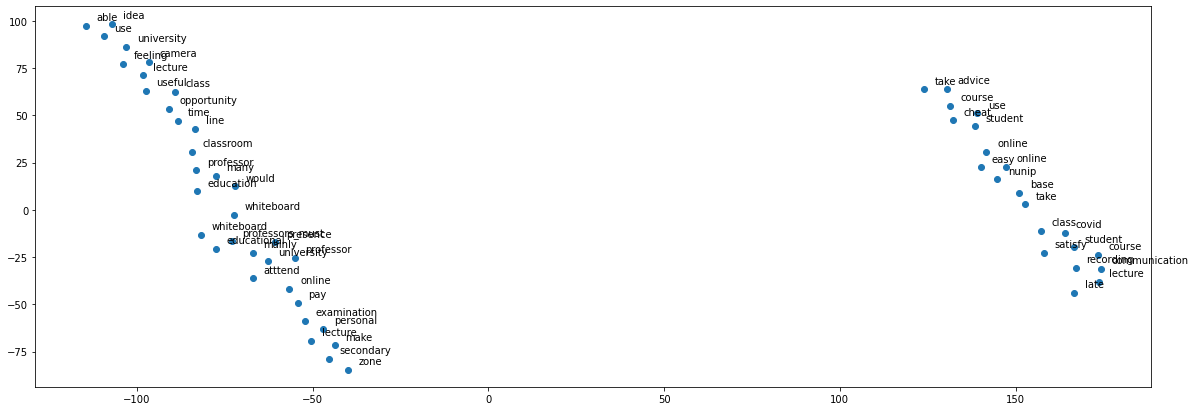

In [323]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=5, n_iter=1000, random_state=42)

sample_vecs = word_vec.wv[set(wordbank)]
sample_tsne = tsne.fit_transform(sample_vecs)
tsne_x = sample_tsne[:, 0]
tsne_y = sample_tsne[:, 1]

f, axes = plt.subplots(figsize=(20,7))
ax = plt.scatter(x=tsne_x, y=tsne_y)

for label, x, y in zip(wordbank, tsne_x, tsne_y):
    plt.annotate(label, xy=(x+3, y+3))

plt.show()

## Topic Modeling
Latent Dirichlet Allocation (LDA) can cluster documents together according to topic, the reviews can be classified and grouped according to the type of teaching mode

In [156]:
cores = multiprocessing.cpu_count()

num_topics  = 1

bowLda = LdaMulticore(bow, num_topics=num_topics,id2word=vocabulary,
                     workers=cores,passes=3,random_state=10)

In [177]:
#nan_list = modeldata[modeldata[0].isna()].index

In [179]:
count = len(modeldata[modeldata["label"] == 'Online'])

In [203]:
modeldata["label"].value_counts()

1    75
0    35
2     6
Name: label, dtype: int64

In [176]:
modeldata = modeldata.dropna(axis=0)


In [181]:
def sampling_smote(data, lab):
    
    sm = SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=50)
    X, y = sm.fit_resample(data, lab)
    
    return X, y

In [190]:
modeldata = get_numerical_data(modeldata)

In [197]:
data, labe = sampling_smote(pcadata.iloc[:, :-1],modeldata["label"]) 

In [202]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, labe, 
                                                stratify=labe, test_size=0.2, random_state=42)

In [249]:
forest = RandomForestClassifier(n_estimators=1200, class_weight={1:5, 2:10, 0:7}, 
                                criterion="entropy",max_depth=120,random_state=42)
forest.fit(xtrain, ytrain)

RandomForestClassifier(class_weight={0: 7, 1: 5, 2: 10}, criterion='entropy',
                       max_depth=120, n_estimators=1200, random_state=42)

In [250]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

ypred = forest.predict(xtest)

accuracy = metrics.accuracy_score(ytest, ypred)
f1_score = metrics.f1_score(ytest, ypred, average="micro")
report = classification_report(ytest, ypred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.33      0.48        15
           1       0.52      0.87      0.65        15
           2       0.86      0.80      0.83        15

    accuracy                           0.67        45
   macro avg       0.74      0.67      0.65        45
weighted avg       0.74      0.67      0.65        45



In [246]:
print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 66.667%
Training Set F1 Score: 0.667


In [254]:
conf_matrx = confusion_matrix(ytest.values, ypred)

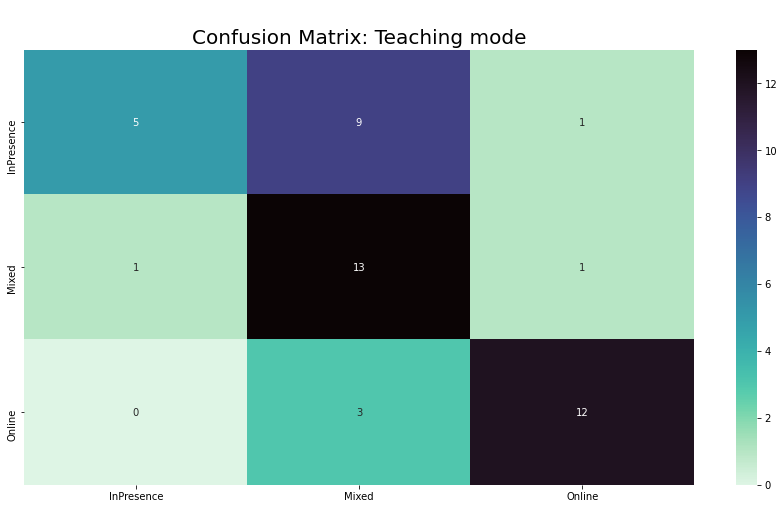

In [255]:
show_heatmap(conf_matrx,['InPresence','Mixed', "Online"],'Teaching mode')

In [256]:
import xgboost as xgb

In [257]:
trainset = xgb.DMatrix(xtrain, label=ytrain)
testset = xgb.DMatrix(xtest, label=ytest)

In [270]:
parameters = {"max_depth": 20, "eta": 0.2, "silent": 1, 
              "objective": "multi:softprob", "num_class": 5}

In [271]:
boost = xgb.train(parameters, trainset, 100)

[08:58:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [272]:
ypred = boost.predict(testset)
ypred = ypred.argmax(axis=1)

In [286]:
#create the confusion matrix of the test set
confmatrix = confusion_matrix(ytest, ypred)
confmatrix = confmatrix.astype("float") / \
                   confmatrix.sum(axis=1)[:, np.newaxis]
confmatrix = np.around(confmatrix, decimals=1)#*100

In [287]:
accuracy = metrics.accuracy_score(ytest, ypred)
f1_score = metrics.f1_score(ytest, ypred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 68.889%
Test Set F1 Score: 0.689


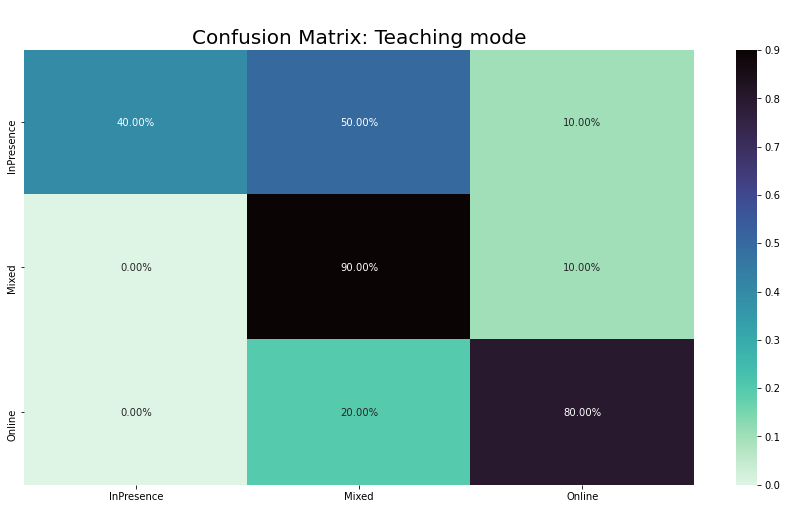

In [288]:
show_heatmap(confmatrix,['InPresence','Mixed', "Online"],'Teaching mode',fmt='.2%')

### Word Cloud


In [291]:
from  wordcloud import WordCloud

In [317]:
wcloud = WordCloud(stopwords=set(stop_words),min_font_size=10,
                  max_font_size=50,max_words=20,
                   background_color='white', colormap='Reds')

In [318]:
online = " ".join(intstudents[intstudents['TeachingMode']=='Online classes']['AdviceOnlineLessons'].values).lower()
mixed = " ".join(intstudents[intstudents['TeachingMode']=='Mixed']['AdviceOnlineLessons'].values).lower()
inpresence = " ".join(intstudents[intstudents['TeachingMode']=='In presence classes']['AdviceOnlineLessons'].values).lower()

In [319]:
text_list = [online,mixed,inpresence]
modes = ['Online', 'Mixed', 'InPresence']

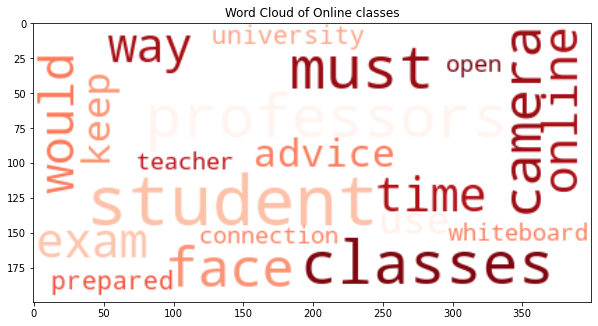

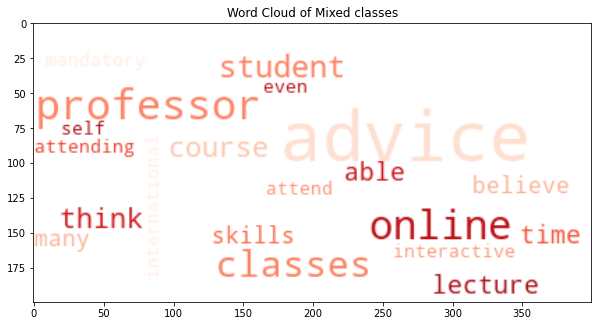

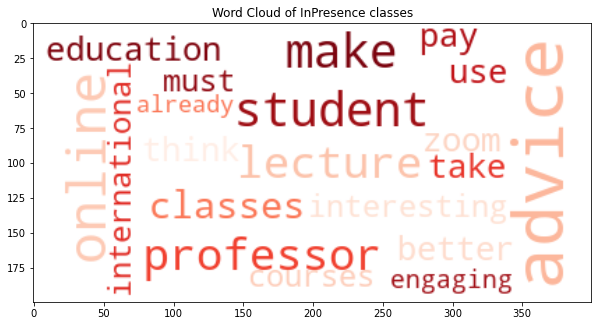

In [321]:

for idx, txt in zip(modes, text_list):
    fig, axes = plt.subplots(figsize=(10,7))
    wcloud.generate(txt)
    plt.imshow(wcloud, interpolation='bilinear')
    plt.title(f'Word Cloud of {idx} classes' )

# ML 

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, normalize
from imblearn.over_sampling import SMOTE

In [23]:
internationML = intstudents.copy(deep=True)

In [24]:
label = internationML.loc[:, ['TeachingMode']]

In [52]:
label['TeachingMode'].value_counts()

Mixed                  76
In presence classes    37
Online classes          6
Name: TeachingMode, dtype: int64

In [25]:
internationalData  = internationML.drop(['TeachingMode','[Other]','Language'], axis=1)

In [27]:
internationalData = get_numerical_data(internationalData)

In [28]:
classes_data = get_numerical_data(label)

In [29]:
def sampling_smote(data, lab):
    
    sm = SMOTE(sampling_strategy='auto', k_neighbors=4, random_state=50)
    X, y = sm.fit_resample(data, lab)
    
    return X, y

In [58]:
bal_internationalData, bal_classes_data = sampling_smote(internationalData,label)

In [243]:
#plot_dostributions(intstudents, 'TeachingMode','Imbalanced Set',20,barmode='group')

In [242]:
#plot_dostributions(bal_classes_data, 'TeachingMode','Imbalanced Set',20,barmode='group')

In [33]:
#internationalData['TypeOfStudent'].value_counts()

standard_F =  StandardScaler().fit_transform(internationalData)
standard_F = normalize(standard_F)
clean_data = pd.DataFrame(standard_F, columns = internationalData.columns)

In [301]:
xtrain,xtest,ytrain,ytest = train_test_split(internationalData,classes_data,stratify=classes_data,
                                             test_size=0.20,random_state=42)

In [317]:
bal_xtrain,bal_xtest,bal_ytrain,bal_ytest = train_test_split(bal_internationalData,bal_classes_data,
                                                             stratify=bal_classes_data,
                                                             test_size=0.20,random_state=100)


model = RandomForestClassifier(n_estimators=500, random_state=100,  ## create n trees
                              max_features='sqrt',max_depth=20, n_jobs=-1, verbose=0)
model.fit(xtrain, ytrain)
featureImportance = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': model.feature_importances_}).sort_values(by='importance',ascending = False)

In [319]:
def get_predictions(xtrain, ytrain, xtest,trees,depth):
    
    estimator = RandomForestClassifier(n_estimators=trees, random_state=42,
                                   bootstrap=True,criterion = 'gini',#min_samples_split=5,
                                   #min_samples_leaf=25,
                                   max_features='sqrt',max_depth=depth, 
                                   n_jobs=-1, verbose=0)
    clf = MultiOutputClassifier(estimator).fit(xtrain, ytrain)
    predictions = clf.predict(xtest)
    
    return predictions

In [320]:
imb_predictions = get_predictions(xtrain, ytrain, xtest,2000, 100)

In [321]:
conf_matrx = confusion_matrix(ytest.values[:, 0], imb_predictions[:, 0])

In [322]:
print("Accuracy = ",accuracy_score(ytest.values,imb_predictions))

Accuracy =  0.8333333333333334


In [323]:
print(classification_report(ytest.values, imb_predictions))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.79      1.00      0.88        15
           2       0.00      0.00      0.00         1

    accuracy                           0.83        24
   macro avg       0.60      0.54      0.55        24
weighted avg       0.83      0.83      0.81        24



In [324]:
bal_predictions = get_predictions(bal_xtrain,bal_ytrain,bal_xtest,500,20)

In [325]:
bal_conf_matrx = confusion_matrix(bal_ytest.values[:, 0], bal_predictions[:, 0])

In [326]:
print("Accuracy = ",accuracy_score(bal_ytest.values,bal_predictions))

Accuracy =  0.9130434782608695


In [327]:
print(classification_report(bal_ytest.values, bal_predictions))

                     precision    recall  f1-score   support

In presence classes       0.80      1.00      0.89        16
              Mixed       1.00      0.73      0.85        15
     Online classes       1.00      1.00      1.00        15

           accuracy                           0.91        46
          macro avg       0.93      0.91      0.91        46
       weighted avg       0.93      0.91      0.91        46



In [277]:
def show_heatmap(conf_matrx,labels,string,fmt='d'):

    conf_matrx = pd.DataFrame(conf_matrx, index=labels, columns=labels)
    plt.figure(figsize=(15,8))
    sns.heatmap(conf_matrx, annot=True, cmap='mako_r', fmt=fmt)
    plt.title('\nConfusion Matrix: ' + string, fontsize=20)
    plt.show()

In [333]:
ytest['TeachingMode'].value_counts()

1    15
0     8
2     1
Name: TeachingMode, dtype: int64

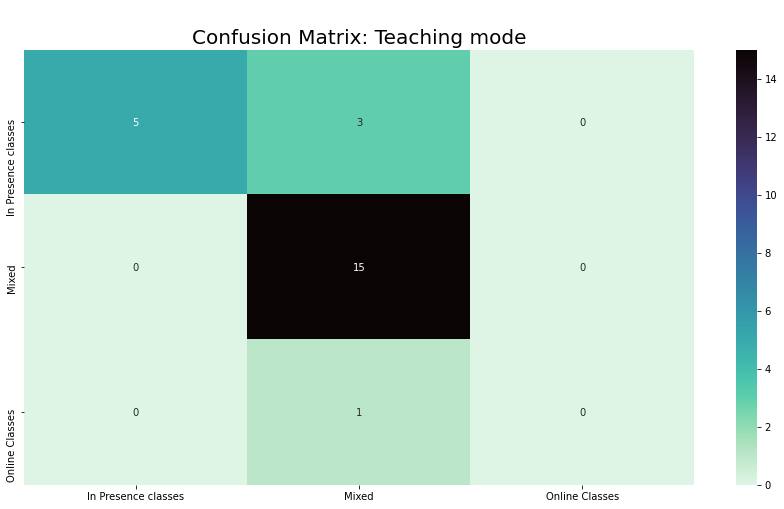

In [330]:
show_heatmap(conf_matrx,['In Presence classes','Mixed', "Online Classes"],'Teaching mode')

In [332]:
bal_ytest['TeachingMode'].value_counts()

In presence classes    16
Mixed                  15
Online classes         15
Name: TeachingMode, dtype: int64

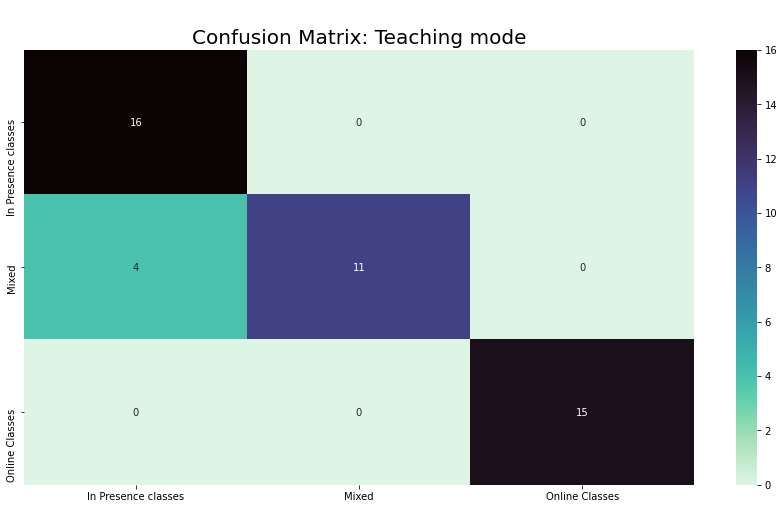

In [331]:
show_heatmap(bal_conf_matrx,['In Presence classes','Mixed', "Online Classes"],'Teaching mode')